# Nutrition Paradox: A Global View on Obesity and Malnutrition

## Step 1:Dataset Overview & Collection

In [1]:
import pandas as pd
import requests
import warnings

warnings = 0


In [2]:
# Obesity datasets
url_adult_obesity = "https://ghoapi.azureedge.net/api/NCD_BMI_30C"
url_child_obesity = "https://ghoapi.azureedge.net/api/NCD_BMI_PLUS2C"

# Malnutrition datasets
url_adult_underweight = "https://ghoapi.azureedge.net/api/NCD_BMI_18C"
url_child_thinness = "https://ghoapi.azureedge.net/api/NCD_BMI_MINUS2C"


In [ ]:
def fetch_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return pd.json_normalize(response.json()['value'])
    else:
        print(f"Failed to fetch data from {url}")
        return pd.DataFrame()

# Fetching datasets
df_adult_obesity = fetch_data(url_adult_obesity)
df_child_obesity = fetch_data(url_child_obesity)
df_adult_underweight = fetch_data(url_adult_underweight)
df_child_thinness = fetch_data(url_child_thinness)


In [4]:
df_adult_obesity["age_group"] = "Adult"
df_adult_underweight["age_group"] = "Adult"
df_child_obesity["age_group"] = "Child/Adolescent"
df_child_thinness["age_group"] = "Child/Adolescent"


In [ ]:
# Combining the obesity-related data
df_obesity = pd.concat([df_adult_obesity, df_child_obesity], ignore_index=True)

# Combining the malnutrition-related data
df_malnutrition = pd.concat([df_adult_underweight, df_child_thinness], ignore_index=True)


In [6]:
df_obesity = df_obesity[df_obesity["TimeDim"].between(2012, 2022)]
df_malnutrition = df_malnutrition[df_malnutrition["TimeDim"].between(2012, 2022)]


In [7]:
df_obesity

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,TimeDim,Dim1,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,age_group
2,3669038,NCD_BMI_30C,COUNTRY,MDG,AFR,YEAR,Africa,SEX,2021,SEX_MLE,...,3.7 [1.7-6.8],3.68962,1.72177,6.84532,None,2024-02-29T16:06:41.017+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00,Adult
5,3672465,NCD_BMI_30C,COUNTRY,FRA,EUR,YEAR,Europe,SEX,2022,SEX_BTSX,...,10.9 [9.6-12.4],10.92481,9.58692,12.36096,None,2024-02-29T16:06:41.017+01:00,2022,2022-01-01T00:00:00+01:00,2022-12-31T00:00:00+01:00,Adult
8,3674698,NCD_BMI_30C,COUNTRY,PHL,WPR,YEAR,Western Pacific,SEX,2017,SEX_FMLE,...,8.4 [7.0-9.9],8.41463,6.99715,9.93353,None,2024-02-29T16:06:41.017+01:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00,Adult
10,3676710,NCD_BMI_30C,COUNTRY,DOM,AMR,YEAR,Americas,SEX,2018,SEX_BTSX,...,26.0 [23.7-28.2],25.97384,23.66421,28.22921,None,2024-02-29T16:06:41.017+01:00,2018,2018-01-01T00:00:00+01:00,2018-12-31T00:00:00+01:00,Adult
14,3680301,NCD_BMI_30C,COUNTRY,KHM,WPR,YEAR,Western Pacific,SEX,2017,SEX_FMLE,...,4.0 [3.4-4.6],3.95142,3.35820,4.59334,None,2024-02-29T16:06:41.017+01:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83136,3663638,NCD_BMI_PLUS2C,COUNTRY,GHA,AFR,YEAR,Africa,SEX,2014,SEX_MLE,...,8.7 [5.9-11.9],8.71078,5.94913,11.94577,None,2024-02-29T16:06:41.017+01:00,2014,2014-01-01T00:00:00+01:00,2014-12-31T00:00:00+01:00,Child/Adolescent
83139,3663993,NCD_BMI_PLUS2C,COUNTRY,BOL,AMR,YEAR,Americas,SEX,2014,SEX_FMLE,...,11.1 [4.5-20.7],11.14351,4.50353,20.71586,None,2024-02-29T16:06:41.017+01:00,2014,2014-01-01T00:00:00+01:00,2014-12-31T00:00:00+01:00,Child/Adolescent
83148,3664795,NCD_BMI_PLUS2C,COUNTRY,KIR,WPR,YEAR,Western Pacific,SEX,2019,SEX_BTSX,...,15.6 [7.2-25.4],15.58351,7.24410,25.38391,None,2024-02-29T16:06:41.017+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00,Child/Adolescent
83152,3665291,NCD_BMI_PLUS2C,COUNTRY,CIV,AFR,YEAR,Africa,SEX,2015,SEX_MLE,...,4.4 [1.0-10.5],4.44626,0.98986,10.51816,None,2024-02-29T16:06:41.017+01:00,2015,2015-01-01T00:00:00+01:00,2015-12-31T00:00:00+01:00,Child/Adolescent


In [8]:
df_malnutrition

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,Dim1,TimeDim,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,age_group
1,3670573,NCD_BMI_18C,COUNTRY,CRI,AMR,YEAR,Americas,SEX,SEX_FMLE,2017,...,2.2 [1.4-3.1],2.16071,1.39641,3.13659,None,2024-02-29T16:06:41.017+01:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00,Adult
5,3673004,NCD_BMI_18C,COUNTRY,TJK,EUR,YEAR,Europe,SEX,SEX_FMLE,2012,...,6.2 [5.0-7.6],6.19024,4.99639,7.55970,None,2024-02-29T16:06:41.017+01:00,2012,2012-01-01T00:00:00+01:00,2012-12-31T00:00:00+01:00,Adult
6,3676458,NCD_BMI_18C,COUNTRY,ZAF,AFR,YEAR,Africa,SEX,SEX_MLE,2019,...,8.2 [6.1-10.6],8.21884,6.10654,10.56783,None,2024-02-29T16:06:41.017+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00,Adult
9,3677729,NCD_BMI_18C,COUNTRY,SWE,EUR,YEAR,Europe,SEX,SEX_BTSX,2012,...,1.4 [1.0-1.9],1.41263,1.04285,1.85392,None,2024-02-29T16:06:41.017+01:00,2012,2012-01-01T00:00:00+01:00,2012-12-31T00:00:00+01:00,Adult
15,3680034,NCD_BMI_18C,COUNTRY,KNA,AMR,YEAR,Americas,SEX,SEX_BTSX,2020,...,2.7 [1.2-5.1],2.70458,1.16426,5.07886,None,2024-02-29T16:06:41.017+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83146,3663424,NCD_BMI_MINUS2C,COUNTRY,VEN,AMR,YEAR,Americas,SEX,SEX_BTSX,2019,...,2.4 [1.1-4.3],2.42135,1.11320,4.30154,None,2024-02-29T16:06:41.017+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00,Child/Adolescent
83149,3663689,NCD_BMI_MINUS2C,COUNTRY,FJI,WPR,YEAR,Western Pacific,SEX,SEX_FMLE,2015,...,4.6 [2.9-6.6],4.56368,2.90331,6.64599,None,2024-02-29T16:06:41.017+01:00,2015,2015-01-01T00:00:00+01:00,2015-12-31T00:00:00+01:00,Child/Adolescent
83150,3663737,NCD_BMI_MINUS2C,WORLDBANKINCOMEGROUP,WB_LMI,None,YEAR,None,SEX,SEX_BTSX,2020,...,13.9 [12.9-14.9],13.88212,12.87417,14.92605,None,2024-02-29T16:06:41.017+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00,Child/Adolescent
83151,3664060,NCD_BMI_MINUS2C,COUNTRY,UGA,AFR,YEAR,Africa,SEX,SEX_MLE,2021,...,7.1 [3.8-11.3],7.13202,3.84619,11.34289,None,2024-02-29T16:06:41.017+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00,Child/Adolescent


# Step 2: 🧹 Data Cleaning & Feature Engineering

In [9]:
columns_to_keep = ['ParentLocation', 'Dim1', 'TimeDim', 'Low', 'High', 'NumericValue', 'SpatialDim', 'age_group']

def clean_and_rename(df):
    df = df[columns_to_keep].copy()
    df.rename(columns={
        'ParentLocation': 'Region',
        'Dim1': 'Gender',
        'TimeDim': 'Year',
        'Low': 'LowerBound',
        'High': 'UpperBound',
        'NumericValue': 'Mean_Estimate',
        'SpatialDim': 'Country'
    }, inplace=True)
    return df

df_obesity = clean_and_rename(df_obesity)
df_malnutrition = clean_and_rename(df_malnutrition)


In [ ]:
# Maping the  WHO gender codes to readable labels
gender_map = {
    'SEX_BTSX': 'Both',
    'SEX_MLE': 'Male',
    'SEX_FMLE': 'Female'
}

# Applying the mappings to Gender column
df_obesity['Gender'] = df_obesity['Gender'].map(gender_map)
df_malnutrition['Gender'] = df_malnutrition['Gender'].map(gender_map)


In [11]:
df_obesity['Gender'].fillna('Both', inplace=True)
df_malnutrition['Gender'].fillna('Both', inplace=True)


C:\Users\obuli\AppData\Local\Temp\ipykernel_10996\3328523423.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_obesity['Gender'].fillna('Both', inplace=True)
C:\Users\obuli\AppData\Local\Temp\ipykernel_10996\3328523423.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [12]:
print(df_obesity['Gender'].value_counts(dropna=False))


Gender
Male      9240
Both      9240
Female    9240
Name: count, dtype: int64


In [14]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pycountry

def convert_country_code(code):
    try:
        return pycountry.countries.get(alpha_3=code).name
    except:
        return None

df_obesity['Country'] = df_obesity['Country'].apply(convert_country_code)
df_malnutrition['Country'] = df_malnutrition['Country'].apply(convert_country_code)


In [14]:
special_cases = {
    'GLOBAL': 'Global',
    'WB_LMI': 'Low & Middle Income',
    'WB_HI': 'High Income',
    'WB_LI': 'Low Income',
    'EMR': 'Eastern Mediterranean Region',
    'EUR': 'Europe',
    'AFR': 'Africa',
    'SEAR': 'South-East Asia Region',
    'WPR': 'Western Pacific Region',
    'AMR': 'Americas Region',
    'WB_UMI': 'Upper Middle Income'
}

df_obesity['Country'].fillna(df_obesity['Region'].map(special_cases), inplace=True)
df_malnutrition['Country'].fillna(df_malnutrition['Region'].map(special_cases), inplace=True)


C:\Users\obuli\AppData\Local\Temp\ipykernel_10996\1788463711.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_obesity['Country'].fillna(df_obesity['Region'].map(special_cases), inplace=True)
C:\Users\obuli\AppData\Local\Temp\ipykernel_10996\1788463711.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

In [15]:
df_obesity['CI_Width'] = df_obesity['UpperBound'] - df_obesity['LowerBound']
df_malnutrition['CI_Width'] = df_malnutrition['UpperBound'] - df_malnutrition['LowerBound']


In [16]:
def classify_obesity(value):
    if value >= 30:
        return 'High'
    elif value >= 25:
        return 'Moderate'
    else:
        return 'Low'

df_obesity['Obesity_Level'] = df_obesity['Mean_Estimate'].apply(classify_obesity)


In [17]:
def classify_malnutrition(value):
    if value >= 20:
        return 'High'
    elif value >= 10:
        return 'Moderate'
    else:
        return 'Low'

df_malnutrition['Malnutrition_Level'] = df_malnutrition['Mean_Estimate'].apply(classify_malnutrition)


# Step 3: Exploratory Data Analysis (EDA)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [19]:
print("Obesity Dataset")
print(df_obesity.info())
print(df_obesity.describe())




Obesity Dataset
<class 'pandas.core.frame.DataFrame'>
Index: 27720 entries, 2 to 83159
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         26268 non-null  object 
 1   Gender         27720 non-null  object 
 2   Year           27720 non-null  int64  
 3   LowerBound     27720 non-null  float64
 4   UpperBound     27720 non-null  float64
 5   Mean_Estimate  27720 non-null  float64
 6   Country        26268 non-null  object 
 7   age_group      27720 non-null  object 
 8   CI_Width       27720 non-null  float64
 9   Obesity_Level  27720 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.3+ MB
None
               Year    LowerBound    UpperBound  Mean_Estimate      CI_Width
count  27720.000000  27720.000000  27720.000000   27720.000000  27720.000000
mean    2017.000000      9.393155     17.068489      12.761041      7.675334
std        3.162335      9.893854     12.395013      1

In [20]:
print("\nMalnutrition Dataset")
print(df_malnutrition.info())
print(df_malnutrition.describe())


Malnutrition Dataset
<class 'pandas.core.frame.DataFrame'>
Index: 27720 entries, 1 to 83155
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Region              26268 non-null  object 
 1   Gender              27720 non-null  object 
 2   Year                27720 non-null  int64  
 3   LowerBound          27720 non-null  float64
 4   UpperBound          27720 non-null  float64
 5   Mean_Estimate       27720 non-null  float64
 6   Country             26268 non-null  object 
 7   age_group           27720 non-null  object 
 8   CI_Width            27720 non-null  float64
 9   Malnutrition_Level  27720 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.3+ MB
None
               Year    LowerBound    UpperBound  Mean_Estimate      CI_Width
count  27720.000000  27720.000000  27720.000000   27720.000000  27720.000000
mean    2017.000000      3.397094      8.147889       5.354451   

In [21]:
print("Missing values in Obesity Dataset:\n", df_obesity.isnull().sum())
print("\nMissing values in Malnutrition Dataset:\n", df_malnutrition.isnull().sum())


Missing values in Obesity Dataset:
 Region           1452
Gender              0
Year                0
LowerBound          0
UpperBound          0
Mean_Estimate       0
Country          1452
age_group           0
CI_Width            0
Obesity_Level       0
dtype: int64

Missing values in Malnutrition Dataset:
 Region                1452
Gender                   0
Year                     0
LowerBound               0
UpperBound               0
Mean_Estimate            0
Country               1452
age_group                0
CI_Width                 0
Malnutrition_Level       0
dtype: int64


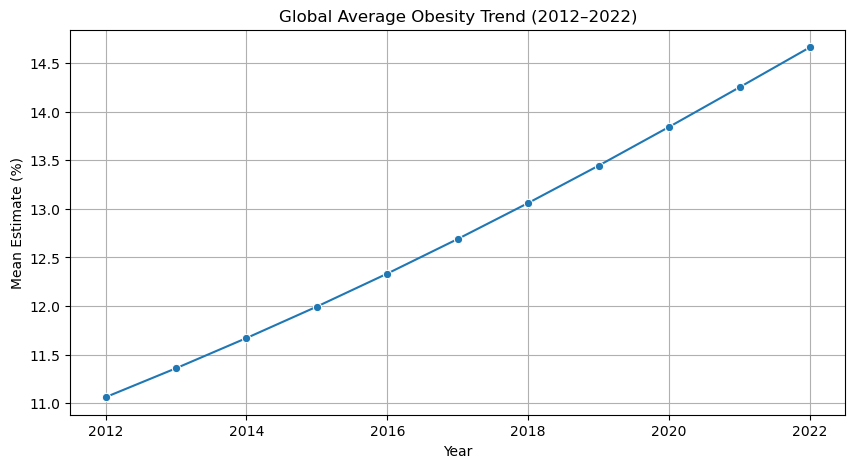

In [22]:
global_trend_obesity = df_obesity.groupby("Year")["Mean_Estimate"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=global_trend_obesity, x='Year', y='Mean_Estimate', marker='o')
plt.title("Global Average Obesity Trend (2012–2022)")
plt.ylabel("Mean Estimate (%)")
plt.xlabel("Year")
plt.grid(True)
plt.show()


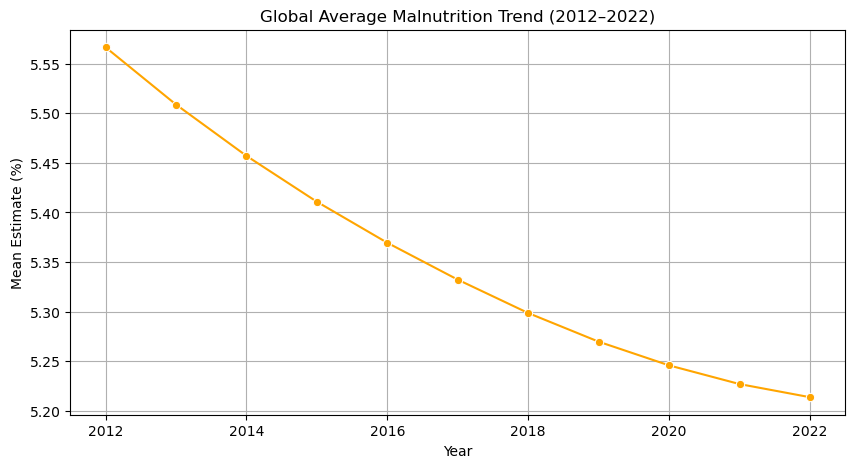

In [23]:
global_trend_mal = df_malnutrition.groupby("Year")["Mean_Estimate"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=global_trend_mal, x='Year', y='Mean_Estimate', marker='o', color='orange')
plt.title("Global Average Malnutrition Trend (2012–2022)")
plt.ylabel("Mean Estimate (%)")
plt.xlabel("Year")
plt.grid(True)
plt.show()


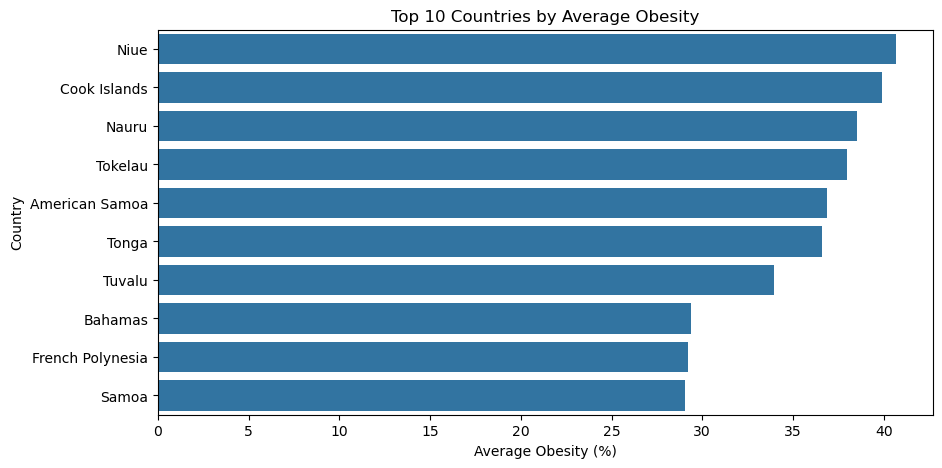

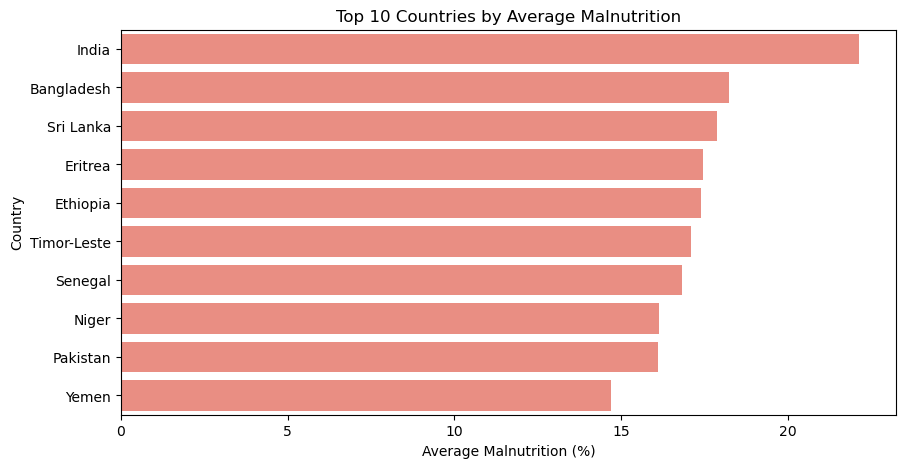

In [24]:
top_obesity = df_obesity.groupby("Country")["Mean_Estimate"].mean().sort_values(ascending=False).head(10)
top_malnutrition = df_malnutrition.groupby("Country")["Mean_Estimate"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_obesity.values, y=top_obesity.index)
plt.title("Top 10 Countries by Average Obesity")
plt.xlabel("Average Obesity (%)")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=top_malnutrition.values, y=top_malnutrition.index, color='salmon')
plt.title("Top 10 Countries by Average Malnutrition")
plt.xlabel("Average Malnutrition (%)")
plt.show()


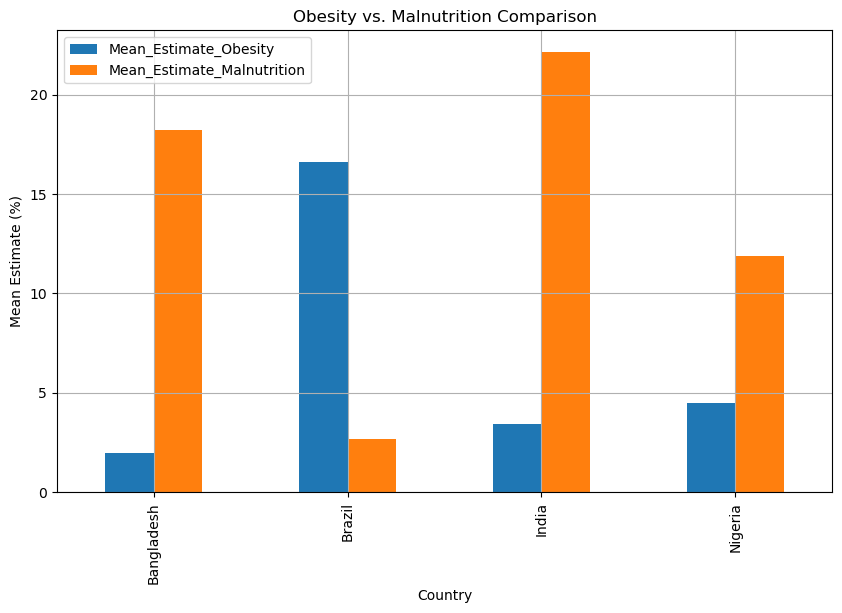

In [ ]:
selected_countries = ['India', 'Nigeria', 'Brazil', 'USA', 'Bangladesh']

# Preparing the combined data
obesity_avg = df_obesity[df_obesity['Country'].isin(selected_countries)].groupby("Country")["Mean_Estimate"].mean().reset_index()
malnutrition_avg = df_malnutrition[df_malnutrition['Country'].isin(selected_countries)].groupby("Country")["Mean_Estimate"].mean().reset_index()

combined = pd.merge(obesity_avg, malnutrition_avg, on="Country", suffixes=('_Obesity', '_Malnutrition'))

combined.plot(kind='bar', x='Country', figsize=(10, 6))
plt.title("Obesity vs. Malnutrition Comparison")
plt.ylabel("Mean Estimate (%)")
plt.grid(True)
plt.show()


In [26]:
df_obesity_clean = df_obesity.dropna(subset=["Gender", "Mean_Estimate"])


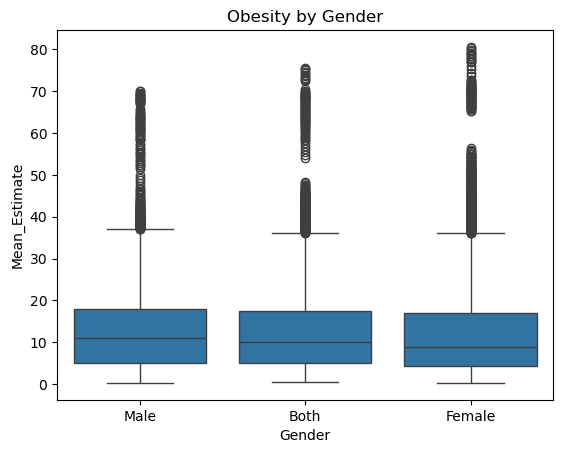

In [27]:
sns.boxplot(data=df_obesity[df_obesity['Gender'].isin(['Male', 'Female', 'Both'])].dropna(subset=['Mean_Estimate']),
            x='Gender', y='Mean_Estimate')
plt.title("Obesity by Gender")
plt.show()



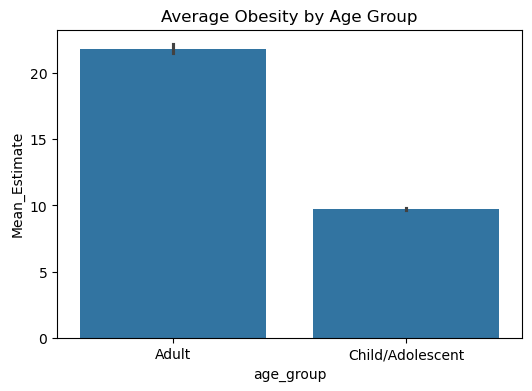

C:\Users\obuli\AppData\Local\Temp\ipykernel_10996\1688620080.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_malnutrition, x='age_group', y='Mean_Estimate', estimator='mean', palette='coolwarm')


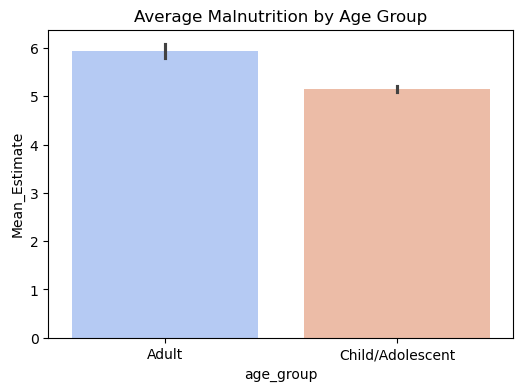

In [28]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df_obesity, x='age_group', y='Mean_Estimate', estimator='mean')
plt.title("Average Obesity by Age Group")
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(data=df_malnutrition, x='age_group', y='Mean_Estimate', estimator='mean', palette='coolwarm')
plt.title("Average Malnutrition by Age Group")
plt.show()


In [29]:
latest_year = 2022
latest_data = df_obesity[df_obesity['Year'] == latest_year]

fig = px.choropleth(latest_data,
                    locations="Country",
                    locationmode="country names",
                    color="Mean_Estimate",
                    title=f"Global Obesity Distribution ({latest_year})",
                    color_continuous_scale="Reds")

fig.show()


✅ Step 4: SQL Table Creation & Data Insertion (MySQL Version)

In [ ]:
!pip install mysql-connector-python

   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   - -------------------------------------- 0.8/16.4 MB 5.6 MB/s eta 0:00:03
   ----- ---------------------------------- 2.4/16.4 MB 7.1 MB/s eta 0:00:02
   -------- ------------------------------- 3.7/16.4 MB 7.0 MB/s eta 0:00:02
   --------------- ------------------------ 6.3/16.4 MB 8.4 MB/s eta 0:00:02
   ----------------------- ---------------- 9.7/16.4 MB 10.1 MB/s eta 0:00:01
   --------------------------------- ------ 13.6/16.4 MB 11.6 MB/s eta 0:00:01
   ---------------------------------------  16.3/16.4 MB 12.6 MB/s eta 0:00:01
   ---------------------------------------- 16.4/16.4 MB 11.6 MB/s eta 0:00:00


In [30]:

import mysql.connector
from mysql.connector import Error


In [ ]:
try:
    connection = mysql.connector.connect(
        host='localhost',        
        user='root',    
        password='Obuli25052004#',
        database='nutrition_db'  
    )

    if connection.is_connected():
        print("Connected to MySQL Server")

except Error as e:
    print("Error while connecting to MySQL", e)


Connected to MySQL Server


In [32]:
cursor = connection.cursor()

# Obesity Table
cursor.execute('''
CREATE TABLE IF NOT EXISTS obesity (
    Year INT,
    Gender VARCHAR(10),
    Mean_Estimate FLOAT,
    LowerBound FLOAT,
    UpperBound FLOAT,
    Age_Group VARCHAR(20),
    Country VARCHAR(100),
    Region VARCHAR(100),
    CI_Width FLOAT,
    Obesity_Level VARCHAR(20)
)
''')

# Malnutrition Table
cursor.execute('''
CREATE TABLE IF NOT EXISTS malnutrition (
    Year INT,
    Gender VARCHAR(10),
    Mean_Estimate FLOAT,
    LowerBound FLOAT,
    UpperBound FLOAT,
    Age_Group VARCHAR(20),
    Country VARCHAR(100),
    Region VARCHAR(100),
    CI_Width FLOAT,
    Malnutrition_Level VARCHAR(20)
)
''')

connection.commit()
print("Tables created successfully!")


Tables created successfully!


In [ ]:

df_obesity = df_obesity.where(pd.notnull(df_obesity), None)

inserted_rows = 0

for _, row in df_obesity.iterrows():
    try:
        cursor.execute('''
            INSERT INTO obesity 
            (Year, Gender, Mean_Estimate, LowerBound, UpperBound, Age_Group, Country, Region, CI_Width, Obesity_Level)
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
        ''', (
            row['Year'], row['Gender'], row['Mean_Estimate'], row['LowerBound'],
            row['UpperBound'], row['age_group'], row['Country'], row['Region'],
            row['CI_Width'], row['Obesity_Level']
        ))
        inserted_rows += 1
    except Exception as e:
        print(f"Error inserting row: {row['Country']}, {row['Year']}. Error: {e}")


connection.commit()
print(f"{inserted_rows} obesity rows inserted.")



27720 obesity rows inserted.


In [ ]:

df_malnutrition = df_malnutrition.where(pd.notnull(df_malnutrition), None)

inserted_rows = 0

for _, row in df_malnutrition.iterrows():
    try:
        cursor.execute('''
            INSERT INTO malnutrition 
            (Year, Gender, Mean_Estimate, LowerBound, UpperBound, Age_Group, Country, Region, CI_Width, Malnutrition_Level)
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
        ''', (
            row['Year'], row['Gender'], row['Mean_Estimate'], row['LowerBound'],
            row['UpperBound'], row['age_group'], row['Country'], row['Region'],
            row['CI_Width'], row['Malnutrition_Level']
        ))
        inserted_rows += 1
    except Exception as e:
        print(f"Error inserting row: {row['Country']}, {row['Year']}. Error: {e}")

connection.commit()
print(f"{inserted_rows} malnutrition rows inserted.")


27720 malnutrition rows inserted.
